## Ребров. Домашка 7

## Задание 1

In [2]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

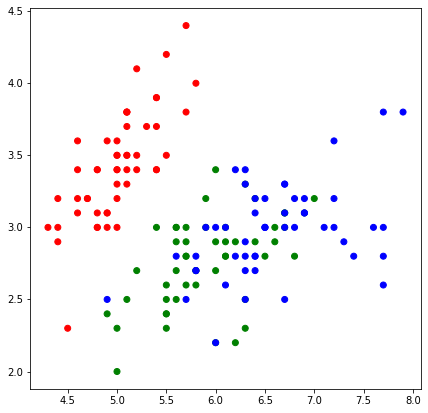

In [124]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [125]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in k_neighbours:
            classes[d[1]] += 1 # вес каждого соседа равен 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

def accuracy(pred, y):
    return (sum(pred == y) / len(y))

def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

Исходный алгоритм
Точность алгоритма при k = 1: 0.667


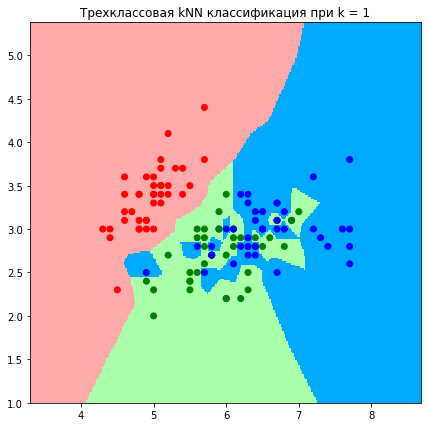

Точность алгоритма при k = 7: 0.800


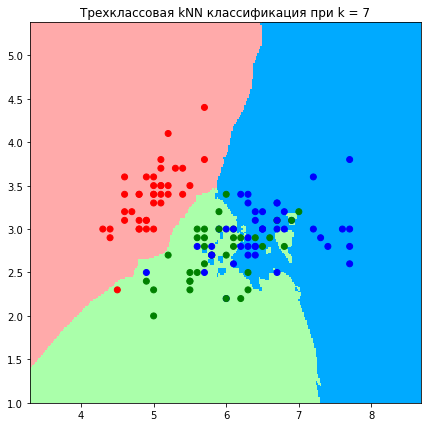

Точность алгоритма при k = 10: 0.833


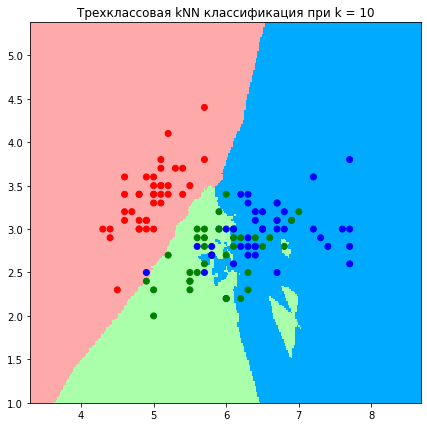

Точность алгоритма при k = 15: 0.833


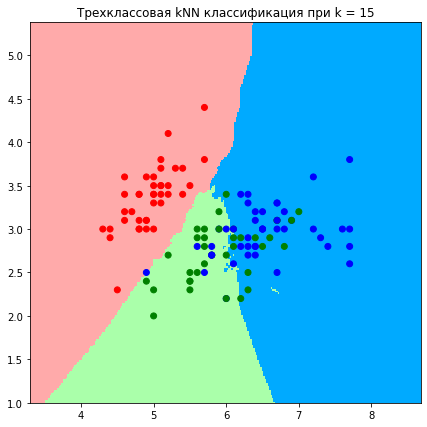

In [104]:
k_list = [1, 7, 10, 15]

print(f'Исходный алгоритм')
for k in k_list:
    y_pred = knn(X_train, y_train, X_test, k)

    print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

    get_graph(X_train, y_train, k)

In [138]:
def knn_w(x_train, y_train, x_test, k, weight):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        ind = 0
        for d in k_neighbours:
            classes[d[1]] += weight ** ind
            ind += 1
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

def knn_w2(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        ind = 1
        for d in k_neighbours:
            classes[d[1]] += (1 / ind)
            ind += 1
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [145]:
def knn_d(x_train, y_train, x_test, k, weight):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        ind = 0
        for d in k_neighbours:
            classes[d[1]] += weight ** distance
            ind += 1
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [146]:
k_list = [1, 3, 5, 7, 10, 15, 20]
weight = 0.5

print(f'Исходный алгоритм')
for k in k_list:
    y_pred = knn(X_train, y_train, X_test, k)

    print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

print(f'Алгоритм для домашки 𝑤(𝑖)=𝑞^𝑖')

for k in k_list:
    y_pred = knn_w(X_train, y_train, X_test, k, weight)

    print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

print(f'Алгоритм для домашки 𝑤(𝑖)=1/𝑖')

for k in k_list:
    y_pred = knn_w2(X_train, y_train, X_test, k)

    print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

print(f'Алгоритм для домашки 𝑤(𝑑)=𝑞^𝑑')
    
for k in k_list:
    y_pred = knn_d(X_train, y_train, X_test, k, weight)

    print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Исходный алгоритм
Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 5: 0.867
Точность алгоритма при k = 7: 0.800
Точность алгоритма при k = 10: 0.833
Точность алгоритма при k = 15: 0.833
Точность алгоритма при k = 20: 0.833
Алгоритм для домашки 𝑤(𝑖)=𝑞^𝑖
Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 3: 0.667
Точность алгоритма при k = 5: 0.667
Точность алгоритма при k = 7: 0.667
Точность алгоритма при k = 10: 0.667
Точность алгоритма при k = 15: 0.667
Точность алгоритма при k = 20: 0.667
Алгоритм для домашки 𝑤(𝑖)=1/𝑖
Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 3: 0.667
Точность алгоритма при k = 5: 0.733
Точность алгоритма при k = 7: 0.733
Точность алгоритма при k = 10: 0.767
Точность алгоритма при k = 15: 0.767
Точность алгоритма при k = 20: 0.800
Алгоритм для домашки 𝑤(𝑑)=𝑞^𝑑
Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 5: 0.867
Точность алгоритма 

меня немного беспокоит результат с q**i. лучший результат получился с 𝑤(𝑑)=𝑞^𝑑 при к=10. В остальном я рассчитывал на другие результаты, а оказалось, что веса только ухудшили точность. Либо я ошибся и добавил их не правильно